## Lets analyze few columns for normal distribution

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load the training dataset
df = pd.read_csv('datasets/daily-bike-share.csv')
# df = pd.read_csv('/content/sample_data/daily-bike-share.csv') # upload CSV file in Colab,

print(df.head())

C:\Users\hi\AppData\Local\Temp\ipykernel_14404\495374119.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   day  mnth  year  season  holiday  weekday  workingday  weathersit  \
0    1     1  2011       1        0        6           0           2   
1    2     1  2011       1        0        0           0           2   
2    3     1  2011       1        0        1           1           1   
3    4     1  2011       1        0        2           1           1   
4    5     1  2011       1        0        3           1           1   

       temp     atemp       hum  windspeed  rentals  
0  0.344167  0.363625  0.805833   0.160446      331  
1  0.363478  0.353739  0.696087   0.248539      131  
2  0.196364  0.189405  0.437273   0.248309      120  
3  0.200000  0.212122  0.590435   0.160296      108  
4  0.226957  0.229270  0.436957   0.186900       82  


The data consists of the following columns:

- **instant**: A unique row identifier
- **day**: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.
- **mnth**: The calendar month in which the observation was made (1:January ... 12:December)
- **yr**: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
- **season**: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)
- **holiday**: A binary value indicating whether or not the observation was made on a public holiday)
- **weekday**: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
- **workingday**: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
- **weathersit**: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
- **temp**: The temperature in celsius (**normalized**)
- **atemp**: The apparent ("feels-like") temperature in celsius (**normalized**)
- **hum**: The humidity level (**normalized**)
- **windspeed**: The windspeed (**normalized**)
- **rentals**: The number of bicycle rentals recorded.

In this dataset, **rentals** represents the label (the *y* value) our model must be trained to predict. The other columns are potential features (*x* values).

As mentioned previously, you can perform some *feature engineering* to combine or derive new features. For example, let's add a new column named **day** to the dataframe by extracting the day component from the existing **dteday** column. The new column represents the day of the month from 1 to 31.

OK, let's start our analysis of the data by examining a few key descriptive statistics. We can use the dataframe's **describe** method to generate these for the numeric features as well as the **rentals** label column.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   year        731 non-null    int64  
 3   season      731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB
None


Because we have to repair the datatypes for both frames and we also want to learn something about programming as a side effect, we write a function for this task. It takes the dataframe, converts the variable "date" into datetime-format, all the categorial data into 'category' respectively 'bool'-format, gives meaningful names to all categories and returns a repaired frame.

In [4]:
print(df.head(10))

   day  mnth  year  season  holiday  weekday  workingday  weathersit  \
0    1     1  2011       1        0        6           0           2   
1    2     1  2011       1        0        0           0           2   
2    3     1  2011       1        0        1           1           1   
3    4     1  2011       1        0        2           1           1   
4    5     1  2011       1        0        3           1           1   
5    6     1  2011       1        0        4           1           1   
6    7     1  2011       1        0        5           1           2   
7    8     1  2011       1        0        6           0           2   
8    9     1  2011       1        0        0           0           1   
9   10     1  2011       1        0        1           1           1   

       temp     atemp       hum  windspeed  rentals  
0  0.344167  0.363625  0.805833   0.160446      331  
1  0.363478  0.353739  0.696087   0.248539      131  
2  0.196364  0.189405  0.437273   0.248309   

In [5]:
# now lets see our data types after the above change.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   year        731 non-null    int64  
 3   season      731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB
None


## Normal Distribution of rental
- Check how well your column (KDE curve) matches a normal distribution.

### 1) Visual Comparison (Quick Check)

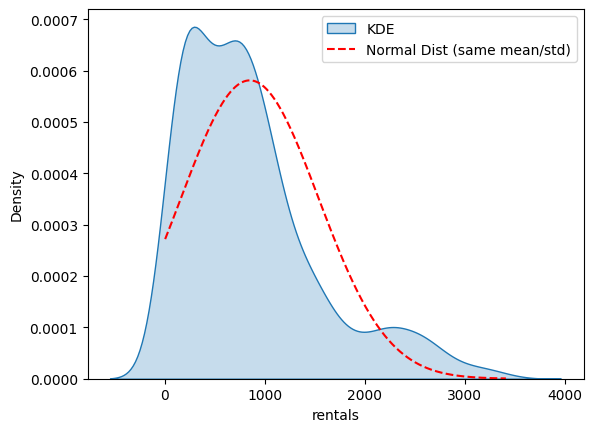

In [6]:

from scipy.stats import norm

feature = df['rentals']  # example column

# Plot KDE
sns.kdeplot(feature, label='KDE', fill=True)

# Generate normal distribution with same mean & std
x = np.linspace(feature.min(), feature.max(), 1000)
p = norm.pdf(x, feature.mean(), feature.std())

# Overlay normal curve
plt.plot(x, p, 'r--', label='Normal Dist (same mean/std)')

plt.legend()
plt.show()

#Obs: Does not look Normal distribution

### 2) Statistical Tests (Quantitative Check)

In [7]:
# 2.1) Shapiro-Wilk Test

from scipy.stats import shapiro

stat, p = shapiro(feature)
print("Shapiro-Wilk Test: stat=%.6f, p=%.15f" % (stat, p))

# p > 0.05 -> data looks Gaussian
# p < 0.05 -> reject normality

#Obs: The p-value from Shapiro-Wilk Test indicates data is not Normal Distribution

Shapiro-Wilk Test: stat=0.885015, p=0.000000000000000


In [8]:
# 2.2) Kolmogorov-Smirnov Test
from scipy.stats import kstest

stat, p = kstest(feature, 'norm', args=(feature.mean(), feature.std()))
print("K-S Test: stat=%.3f, p=%.10f" % (stat, p))

# stat → The test statistic (the max difference between the two CDFs).
# Closer to 0 → your data is close to normal.
# Larger → more deviation.
    
# p > 0.05 -> data looks Gaussian
# p < 0.05 -> reject normality

#Obs: Data is not normal

K-S Test: stat=0.114, p=0.0000000111


### 3) Q-Q Plot (Visual + Quantitative)

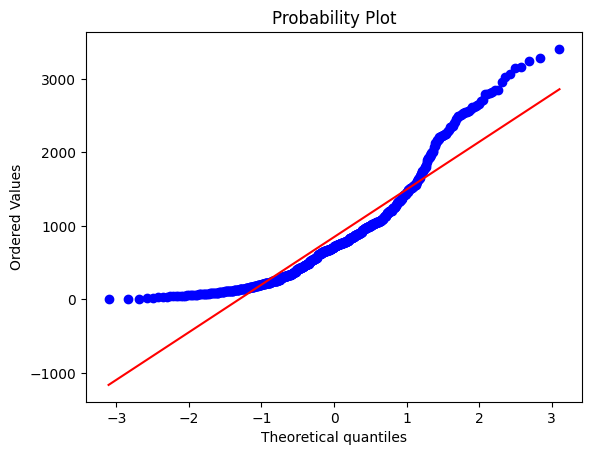

In [9]:
# Q-Q (quantile-quantile) plots show how close your data quantiles are to normal distribution quantiles:
import scipy.stats as stats

stats.probplot(feature, dist="norm", plot=plt)
plt.show()

# If points lie close to the straight diagonal, your data is approximately normal.
# Obs: We see that data is not normal.

In [ ]:
# conclusion: Rental data is not normal 

## Normal Distribution of humidity
- Check how well your column (KDE curve) matches a normal distribution.

In [ ]:
### 1) Visual Comparison (Quick Check)

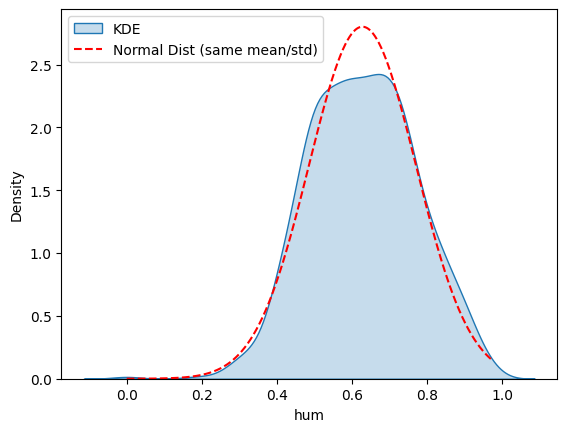

In [11]:

from scipy.stats import norm

feature = df['hum']

# Plot KDE
sns.kdeplot(feature, label='KDE', fill=True)

# Generate normal distribution with same mean & std
x = np.linspace(feature.min(), feature.max(), 1000)
p = norm.pdf(x, feature.mean(), feature.std())

# Overlay normal curve
plt.plot(x, p, 'r--', label='Normal Dist (same mean/std)')

plt.legend()
plt.show()

# obs: The data looks almost normal

### 2) Statistical Tests (Quantitative Check)

In [12]:
# 2.1) Shapiro-Wilk Test

from scipy.stats import shapiro

stat, p = shapiro(feature)
print("Shapiro-Wilk Test: stat=%.6f, p=%.15f" % (stat, p))

# p > 0.05 -> data looks Gaussian
# p < 0.05 -> reject normality

#  obser: The p-value from Shapiro-Wilk Test indicates that data is not normal

Shapiro-Wilk Test: stat=0.993345, p=0.002480849411516


In [13]:
# 2.2) Kolmogorov-Smirnov Test
from scipy.stats import kstest

stat, p = kstest(feature, 'norm', args=(feature.mean(), feature.std()))
print("K-S Test: stat=%.3f, p=%.10f" % (stat, p))


# stat → The test statistic (the max difference between the two CDFs).
# Closer to 0 → your data is close to normal.
# Larger → more deviation.
    
# p > 0.05 -> data looks Gaussian
# p < 0.05 -> reject normality

K-S Test: stat=0.034, p=0.3635691862


### 3) Q-Q Plot (Visual + Quantitative)

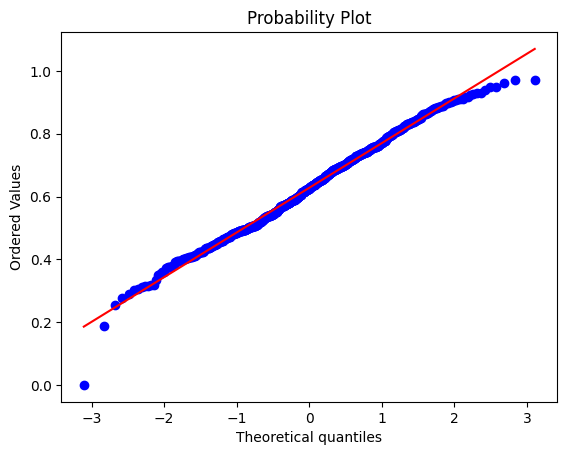

In [14]:
# Q-Q (quantile-quantile) plots show how close your data quantiles are to normal distribution quantiles:
import scipy.stats as stats

stats.probplot(feature, dist="norm", plot=plt)
plt.show()

# If points lie close to the straight diagonal, your data is approximately normal.
# Obs: We see that data looks normal.

# conlusion: The data is normal

## Normal Distribution of windspeed
- Check how well your column (KDE curve) matches a normal distribution.

### 1) Visual Comparison (Quick Check)

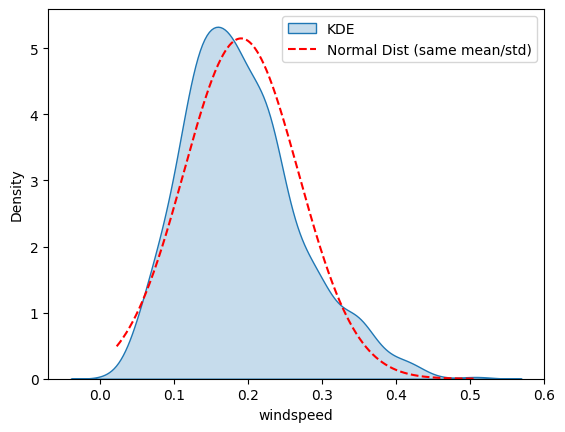

In [15]:

from scipy.stats import norm

feature = df['windspeed']

# Plot KDE
sns.kdeplot(feature, label='KDE', fill=True)

# Generate normal distribution with same mean & std
x = np.linspace(feature.min(), feature.max(), 1000)
p = norm.pdf(x, feature.mean(), feature.std())

# Overlay normal curve
plt.plot(x, p, 'r--', label='Normal Dist (same mean/std)')

plt.legend()
plt.show()

# obs: The data looks almost normal

In [ ]:
### 2) Statistical Tests (Quantitative Check)

In [16]:
# 2.1) Shapiro-Wilk Test

from scipy.stats import shapiro

stat, p = shapiro(feature)
print("Shapiro-Wilk Test: stat=%.6f, p=%.15f" % (stat, p))

# p > 0.05 -> data looks Gaussian
# p < 0.05 -> reject normality

#  obser: The p-value from Shapiro-Wilk Test indicates that data is not normal

Shapiro-Wilk Test: stat=0.971232, p=0.000000000084261


In [17]:
# 2.2) Kolmogorov-Smirnov Test
from scipy.stats import kstest

stat, p = kstest(feature, 'norm', args=(feature.mean(), feature.std()))
print("K-S Test: stat=%.3f, p=%.10f" % (stat, p))


# stat → The test statistic (the max difference between the two CDFs).
# Closer to 0 → your data is close to normal.
# Larger → more deviation.
    
# p > 0.05 -> data looks Gaussian
# p < 0.05 -> reject normality

K-S Test: stat=0.063, p=0.0060995159


### 3) Q-Q Plot (Visual + Quantitative)

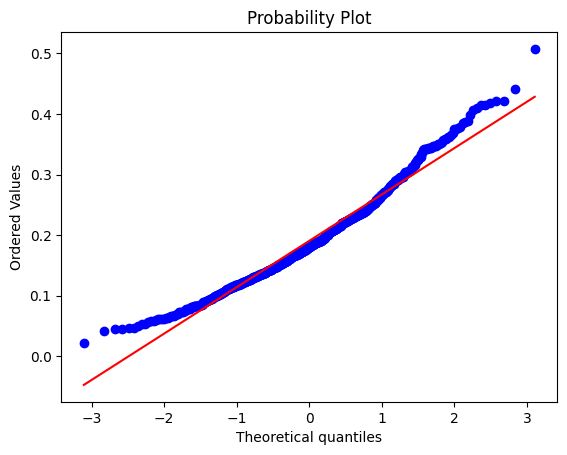

In [18]:
# Q-Q (quantile-quantile) plots show how close your data quantiles are to normal distribution quantiles:
import scipy.stats as stats

stats.probplot(feature, dist="norm", plot=plt)
plt.show()

# If points lie close to the straight diagonal, your data is approximately normal.
# Obs: We see that data looks normal.